# Realistic equation solving
## System definition
$\renewcommand\dfrac[2]{{\frac{\mathrm{d}#1}{\mathrm{d}#2}}}$
Consider the system shown in the figure below:

<img src="pressuresystem.png">

A gas is flowing out of a pressurised vessel through a pipe with a
non-negligible pressure drop. The container is also accepting a flow
from an upstream process. We are interested in modelling the pressure
in the tank.

The following equations describe the behaviour of the system:
\begin{align}
  \dfrac{m}{t}        & =        F_i - F_o      \\
  F_i                 & =        W(P_u - P)     \\
  F_o                 & =        f'L(P - P_a)   \\
  \rho                & =        \frac{m}{V}    \\
  \mathrm{Re}         & \approx  1700 \rho      \\
  P                   & =        \frac{mRT}{MV} \\
  \frac{1}{\sqrt{f'}} & =        -2\log_{10}\left( \frac{\epsilon/D}{3.7} + \frac{2.51}{\mathrm{Re}\sqrt{f'}}\right)
\end{align}


The obvious parameters and their values are given below:

<table>
<tr><th>Name</th><th>Value</th>
<tr><td>    $W$        </td><td> 0.1 kg/(kPa.s)  </td></tr>
<tr><td>    $P_a$      </td><td> 101.325 kPa     </td></tr>
<tr><td>    $V$        </td><td> 25.13 m$^3$       </td></tr>
<tr><td>    $R$        </td><td> 8.314 J/(mol.K) </td></tr>
<tr><td>    $T$        </td><td> 25 °C     </td></tr>
<tr><td>    $M$        </td><td> 24.52 kg/kmol   </td></tr>
<tr><td>    $\epsilon$ </td><td> 0.046 mm        </td></tr>
<tr><td>    $D$        </td><td> 25 mm           </td></tr>
<tr><td>    $L$        </td><td> 10 m            </td></tr>
</table>

In [1]:
W = 0.1 # kg/(kPa.s)
P_a = 101.325 # kPa
V =  25.13 #  m^3
R = 8.314 #  J/(mol.K)
T = 25 + 273.15 # K
M = 24.52 # kg/kmol
epsilon = 0.046 # mm
D = 25 # mm
L = 10 # m

## Solving algebraic equations
We realise quickly that most of these equations can be substituted into one another to yield a single differential equation for $\dfrac{m}{t}$, except the Colebrook equation, which requires numeric
solution, as we discussed in Tut 2.

For simplicity in our models we can write $f' = f_c(\epsilon, D, \mathrm{Re})$.

Another opportunity for solution of algebraic equations is to find a steady state of the system equations.
This can be done quite easily with the routine `scipy.optimize.fsolve`, which you also covered in your MPR course (check chapter 17 if you're a bit rusty).

## ODE formulation
If we suppose that we have a special function $f_c$ that can calculate
the friction factor $f'$ given the other parts of the Colebrook
equation, we can easily rearrange the equations above to the following
set.

\begin{align}
  \rho         & =         \frac{m}{V} \\
  Re             & \approx 1700 \rho \\
  f'           & =         f_c(\epsilon,D,\mathrm{Re}) \\
  P            & =         \frac{mRT}{MV} \\
  F_i          & =         W(P_u - P) \\
  F_o          & =         f'L(P - P_a) \\
  \dfrac{m}{t} & =         F_i - F_o \\
\end{align}


These equations just require the current value of $m$ and parameters in the table to calculate the rest of the values.

We already know how to use `scipy.integrate.odeint` to solve this kind of
problem.  The only difference in this case is that we get out $m(t)$,
but we want $P(t)$.  We could have rewritten the equations to
calculate $\dfrac{P}{t}$ instead of $\dfrac{m}{t}$, but if we want to
plot the value of $P$ over time, instead of $m$, we can simply
calculate $P=\frac{mRT}{MV}$ for each of the values of $m$ after integration.

Remember that `scipy.integrate.odeint` expects a function of the form
\begin{equation}
  \dot{\mathbf{x}} = f(\mathbf{x}, t)
\end{equation}

## Simulation task
You will use the information about the gas flow system to solve the dynamic balances for the system that as the upstream pressure changes from 200 kPa to 250 kPa.
We will assume that the system was at steady state initially and plot a graph showing the pressure in the tank over time.


### Question 1
Write a function called `colebrook` that will accept values for $\epsilon$, $D$ and Re and will use the successive substitution technique that we saw was the fastest in Computer Tut 1 to calculate $f$.
Stop when your error is less than $10^{-10}$.

In [2]:
import numpy

def colebrook(epsilon, D, Re):
    
    return

### BEGIN SOLUTION
def colebrook(epsilon, D, Re):
    f = 0.02
    for _ in range(1000):
        old_f = f
        f = (1/(-2*numpy.log10((epsilon/D)/3.7 + 2.51/(Re*numpy.sqrt(f)))))**2
        if abs(old_f - f) < 1e-10:
            break
    
    return f

### END SOLUTION

In [3]:
# DO NOT CHANGE CELL
### BEGIN HIDDEN TESTS
assert round(colebrook(epsilon, D, 2000), 9) == round(0.050848753900082422, 9)
assert round(colebrook(epsilon, D, 20000), 9) == round(0.029505699863047755, 9)
### END HIDDEN TESTS


### Question 2
Write a function called `pressuresystem` that will accept the parameters as defined above, a value for $P_u$ and a value for $m$. It will return the derivative.
You can use your `colebrook` function as $f_c$.

In [4]:
def pressuresystem(P_u, m):
    
    return 

### BEGIN SOLUTION
def pressuresystem(P_u, m):
    rho = m/V
    Re = 1700 * rho
    f = colebrook(epsilon, D, Re)
    P = m*R*T/(M*V)
    F_i = W*(P_u - P)
    F_o = f*L*(P - P_a)
    dmdt = F_i - F_o

    return dmdt
### END SOLUTION



In [5]:
# DO NOT CHANGE
### BEGIN HIDDEN TESTS
assert round(pressuresystem(500, 200), 2) == round(-252.75245385993117, 2)
assert round(pressuresystem(200, 100), 2) == round(-130.40514126864343, 2)
### END HIDDEN TESTS

### Question 3
Use the `scipy.optimize.fsolve` function to find the steady-state value of $m$ for an upstream pressure of 200 kPa. Name your steady state value m0 (the number zero). **Note** that m0 should be a single value not an array or list.

In [6]:
import scipy.optimize

P_u = 200

### BEGIN SOLUTION
# Solve for steady state
def steady(m):
    return pressuresystem(P_u, m)

m0 = scipy.optimize.fsolve(steady, 30)
m0 = m0[0]
### END SOLUTION

In [7]:
# DO NOT CHANGE
#### BEGIN HIDDEN TESTS
assert round(m0, 2) == round(29.206050329657909, 2)
### END HIDDEN TESTS

### Question 4
Simulate the system for 10 s and plot the upstream pressure and tank pressure on the same graph.

In [8]:
import scipy.integrate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We need to define a function of the type that `odeint` can work with. Use the values given for time interval when integrating. name your pressure values (plot "y-vals") P.

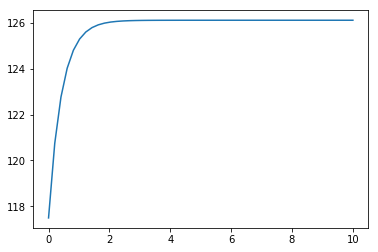

In [9]:
def pressurefunc(m, t):
    return

ts = numpy.linspace(0, 10)

# P = [....]

### BEGIN SOLUTION
def pressurefunc(m, t):
    return pressuresystem(P_u, m)
P_u = 250
ts = numpy.linspace(0, 10)
ms = scipy.integrate.odeint(pressurefunc, m0, ts)
P = ms*R*T/(M*V)
# plt.axhline(P_u)
plt.plot(ts, P)
### END SOLUTION

assert round(P[3][0],2) ==  round(124.0281199972205,2) # test to help you see if your answer is correct.

#you must plot the graph, it will be marked.


# Valve Simulation

# Higher order differential equations

$\renewcommand\dfrac[2]{{\frac{\mathrm{d}#1}{\mathrm{d}#2}}}$
The figure below shows a simplified diagram of a control
valve. Air pressure is used to move a diaphragm attached by a rod to a
plug that closes off the flow. A spring pushes the rod in the opposite
direction that the pressure from the diaphragm does.

<img src="controlvalve.png">

The combination of the spring, the rod mass and the damping supplied by the flowing liquid makes this a spring-mass-damper system.
You may remember this situation from MPR; if not have a look at Chapter 17 of the MPR notes again.
The equations of motion applied to the system yields the following relationship between the pressure signal $P_S$ and the rod position $x$, which is normalised to be between 0 and 1.

\begin{equation}
  \tau^2 \dfrac{^2x}{t^2} + 2\tau \zeta \dfrac{x}{t} + x =K_F(P_S-20)
\end{equation}

The `scipy.integrate.odeint` function can be used to integrate functions of the form $\dfrac{y}{t} = f(y, t)$, but the second order derivative in equation~\ref{eq:contvalve} does not conform to this form.
To resolve this issue, we can rewrite the single second order ODE in equation~\ref{eq:contvalve} as two first order ODEs by creating a dummy state $z=\dfrac{x}{t}$.

The new set of equations looks like this:
\begin{eqnarray}
  \dfrac{x}{t} & = & z \\
  \tau^2 \dfrac{z}{t} + 2\tau \zeta z + x &=&K_F(P_S-20)
\end{eqnarray}

To get this in the standard form, we can write them as a vector equation, replacing $x$ and $z$ with a vector $\mathbf{y}$

\begin{eqnarray}
  \dfrac{}{t}\left[ \begin{array}{c}x \\ z \end{array} \right ] &=&
  \left [
    \begin{array}{c}
      z \\
      \tau^{-2} \left ( K_F(P_S-20) - 2\tau \zeta z - x\right )
    \end{array} \right ]  \\
  \dfrac{\mathbf{y}}{t} &=&  \left [
    \begin{array}{c}
      y_2 \\
      \tau^{-2} \left ( K_F(P_S-20) - 2\tau \zeta y_2  - y_1\right )
    \end{array} \right ]
\end{eqnarray}

## Question 1
Write a function for control valve dynamics using the above equation.
  

In [10]:
def cvder(y, tau, zeta, Kf, Ps):
    return 

### BEGIN SOLUTION   
def cvder(y, tau, zeta, Kf, Ps):
    return [y[1], 
            tau**-2*(Kf*(Ps - 20) - 2*tau*zeta*y[1] - y[0])]
### END SOLUTION



In [11]:
# DO NOT CHANGE
### BEGIN HIDDEN TESTS
assert cvder([1,1],1,1,1,1) == [1, -22.0]

### END HIDDEN TESTS

## Question 2
$\newcommand{SI}{#1 #2}$A widely used convention for air pressure signals is that they vary between 20 kPa and 100 kPa.  If a 20 kPa signal corresponds to $x=0$ and 100 kPa corresponds to $x=1$, calculate the value of $K_F$.  

In [12]:
Kf = 1 # use this variable name

### BEGIN SOLUTION
Kf = (1 - 0)/(100 - 20)

### END SOLUTION 



In [13]:
# DO NOT CHANGE
### BEGIN HIDDEN TESTS
assert Kf == (1 - 0)/(100 - 20)
### END HIDDEN TESTS

## Question 3
Calculate the pressure signal ($P_s$) required to move the valve to  $x=70\%$ (at steady state)

In [14]:
Ps = 1 # use this variable for your answer (same name)
### BEGIN SOLUTION
x = 0.7
Ps = x/Kf + 20

### END SOLUTION



In [15]:
# DO NOT CHANGE
### BEGIN HIDDEN TESTS
assert Ps == 76
### END HIDDEN TESTS

## Question 4
We are now ready to simulate the system. Use the following values for the constants: $\tau=2.1$ s, $\zeta=0.5$

In [16]:
tau = 2.1
zeta = 0.5

We  will start the valve steady at 30 % open ($x=0.3$, $\dfrac{x}{t}=0$) and simulate it opening to $x=70 \%$.   Now simulate the response using `scipy.integrate.odeint`. Marks will be awarded for your simulation graph only.

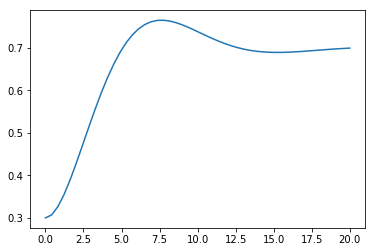

In [17]:
import numpy
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

y0 = [0.3, 0]             
ts = numpy.linspace(0, 20)  # use this timespace

### BEGIN SOLUTION
def valvefunc(y, t):
    return cvder(y, tau, zeta, Kf, Ps)
ys = scipy.integrate.odeint(valvefunc, y0, ts)
xs = ys[:, 0]
plt.plot(ts, xs)

### END SOLUTION